# Kaggle Bisaillon Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

import tensorflow as tf

## Loading `csv`

In [5]:
true_filepath = '../raw_data/kaggle_Bisaillon/True.csv'
fake_filepath = '../raw_data/kaggle_Bisaillon/Fake.csv'

true = pd.read_csv(true_filepath)
fake = pd.read_csv(fake_filepath)

print('-'*80)
print(f"true shape: {true.shape}")
print(f"fake shape: {fake.shape}")
print('-'*80)

--------------------------------------------------------------------------------
true shape: (21417, 4)
fake shape: (23481, 4)
--------------------------------------------------------------------------------


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Duplicates

In [7]:
def count_duplicate(df):
    return df.duplicated().sum()

In [8]:
print('-'*80)
print(f"true duplicates: {count_duplicate(true)}")
print(f"fake duplicates: {count_duplicate(fake)}")
print('-'*80)

--------------------------------------------------------------------------------
true duplicates: 206
fake duplicates: 3
--------------------------------------------------------------------------------


In [9]:
true.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)

print('-'*80)
print(f"true shape (wo duplicates): {true.shape}")
print(f"fake shape (wo duplicates): {fake.shape}")
print('-'*80)

--------------------------------------------------------------------------------
true shape (wo duplicates): (21211, 4)
fake shape (wo duplicates): (23478, 4)
--------------------------------------------------------------------------------


### Merging the `true` / `fake` dataframes

In [10]:
true['category'] = 0
fake['category'] = 1

data = pd.concat([true, fake]).reset_index()

print('-'*80)
print(f"data shape: {data.shape}")
print('-'*80)
print(f"ratio #true: {len(data[data['category']==0])/len(data)*100:.2f}%")
print(f"ratio #false: {len(data[data['category']==1])/len(data)*100:.2f}%")
print('-'*80)

--------------------------------------------------------------------------------
data shape: (44689, 6)
--------------------------------------------------------------------------------
ratio #true: 47.46%
ratio #false: 52.54%
--------------------------------------------------------------------------------


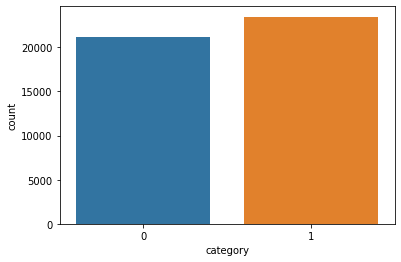

In [11]:
sns.countplot(x=data.category);

### Missing values

In [12]:
def get_missing(df):
    missing_values = df.isnull().sum().sort_values(ascending = False)
    ratio = missing_values/len(data)*100
    return pd.DataFrame({'missing_values': missing_values, 'ratio': round(ratio)}).head(10)

In [13]:
get_missing(data)

,missing_values,ratio
index,0,0.0
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
category,0,0.0


### EDA

In [14]:
data.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Preprocessing

In [15]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [16]:
data.head()

,index,title,text,subject,date,category
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [17]:
# Apply to all texts
data['clean_text'] = data.text.apply(clean)
# data['clean_text'] = data['clean_text'].astype('str')

In [18]:
data.head()

,index,title,text,subject,date,category,clean_text
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"[washington, reuters, head, conservative, repu..."
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,"[washington, reuters, transgender, people, all..."
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,"[washington, reuters, special, counsel, invest..."
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,"[washington, reuters, trump, campaign, adviser..."
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,"[seattle, washington, reuters, president, dona..."


In [19]:
len(data.loc[0, 'clean_text'])

440

## Training

In [20]:
X = data[['clean_text']].copy()
y = data[['category']].copy()

print('-'*80)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X shape: (44689, 1)
y shape: (44689, 1)
--------------------------------------------------------------------------------


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('-'*80)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print('-'*80)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X_train shape: (31282, 1)
y_train shape: (31282, 1)
--------------------------------------------------------------------------------
X_test shape: (13407, 1)
y_test shape: (13407, 1)
--------------------------------------------------------------------------------


### Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

print('-'*80)
print(f"X_train_token shape: {len(X_train_token)}")
print(f"X_test_token shape: {len(X_test_token)}")
print('-'*80)

In [ ]:
vocab_size = len(tokenizer.word_index)

print('-'*80)
print(f"vocab_size: {vocab_size}")
print('-'*80)

### Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')
# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

### Model - embedding layer included

In [ ]:
def init_model():

    embedding_size = 5

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim = vocab_size+1,
        input_length = 4958, # Max_sentence_length (optional, for model summary)
        output_dim = embedding_size,# 100
        mask_zero = True, # Included masking layer :)
    ))

    model.add(tf.keras.layers.LSTM(20, activation='tanh'))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [ ]:
init_model().summary()

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=2, 
                  callbacks=[es],
                  verbose=1)

In [ ]:
history.history

In [ ]:
def plot_loss(history, title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('ACC')
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    if title:
        fig.suptitle(title)
    plt.show()

In [ ]:
plot_loss(history, title=None)

In [ ]:
results = model.evaluate(X_test_pad, y_test)

print('-'*80)
print(f"test score (MAPE): {results[1]:.3f}")
print('-'*80)

## Word2Vec

In [23]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_train, vector_size=10, min_count=10, window=10)

unique = set([_ for elt in X_train for _ in elt])

# print('-'*80)
# print(f"X_train vocabulary size: {len(unique)}")
# print(f"word2vec vocabulary size: {len(word2vec.wv.key_to_index)}")    
# print('-'*80)

RuntimeError: you must first build vocabulary before training the model

In [ ]:
def embed_sentence(word2vec, sentence):
    embed_matrix = []
    for word in sentence:
        if word in word2vec.wv.key_to_index:
            embed_matrix.append(word2vec.wv[word])
    return np.array(embed_matrix)

def embedding(word2vec, sentences):
    return [embed_sentence(word2vec, sentence) for sentence in sentences]

In [ ]:
X_train_embed = embedding(word2vec, X_train[0])
X_test_embed = embedding(word2vec, X_test[0])

X_train_embed.shape

In [ ]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')
# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

## Model

In [ ]:
def init_model():

    embedding_size = 5

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(20, activation='tanh'))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=2, 
                  callbacks=[es],
                  verbose=1)